## Problem Statement 

You need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others 


With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.

## Pipelines that needs to be performed:

You need to perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling 

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

# <font color='green'>Task1:Data Reading/Data Understanding</font>

## Importing the necessary libraries and downloading the required packages

In [254]:
import warnings
warnings.filterwarnings('ignore')
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from pprint import pprint
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from PIL import Image
from sklearn.decomposition import NMF


In [255]:
#Download punkt
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rr613572\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [256]:
#Download wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rr613572\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [257]:
#Install stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rr613572\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [258]:
# Opening JSON file 
f = open('complaints-2021-05-14_08_16.json')
  
# returns JSON object as a dictionary 
data = json.load(f)
df=pd.json_normalize(data)
#Check whether data loaded properly
df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [259]:
#Get the info for the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [260]:
#Print the dataframe
df

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78308,complaint-public-v2,complaint,3105617,0.0,None,08857,3105617,Closing an account,2018-12-20T12:00:00-05:00,NJ,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2018-12-21T12:00:00-05:00,None,Checking account,Yes,,Funds not received from closed account,Consent not provided
78309,complaint-public-v2,complaint,3091984,0.0,None,934XX,3091984,"Other features, terms, or problems",2018-12-05T12:00:00-05:00,CA,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Web,2018-12-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Other problem,Consent provided
78310,complaint-public-v2,complaint,3133355,0.0,None,923XX,3133355,Problem with a lender or other company chargin...,2019-01-25T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-01-25T12:00:00-05:00,None,Checking account,Yes,I am not familiar with XXXX pay and did not un...,Transaction was not authorized,Consent provided
78311,complaint-public-v2,complaint,3110963,0.0,None,None,3110963,"Other features, terms, or problems",2018-12-27T12:00:00-05:00,PA,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Web,2018-12-27T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I have had flawless credit for 30 yrs. I've ha...,Problem with balance transfer,Consent provided


####  <font color='red'>There are 21 columns of object-type and one column score which is of float-type,total 78313 rows</font>

# <font color='green'>Task2:Data Cleaning</font>

## Data preparation

In [261]:
# Inspect the dataframe to understand the given data.
df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [262]:
#print the column names
df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [263]:
#Assign new column names
df.rename(columns={'_source.complaint_what_happened':'complaint_what_happened', '_source.product':'product'}, inplace=True)

In [264]:
#Take only the required columns
df = df[['complaint_what_happened', 'product']]

In [265]:
#Assign nan in place of blanks in the complaints column
df.complaint_what_happened.replace(r'', np.nan, regex=True, inplace=True)

In [266]:
#Remove all rows where complaints column is nan
df = df[df.complaint_what_happened.notna()]

In [267]:
#Get the count of number of rows
len(df)

21072

In [268]:
#Print the dataframe
df

,complaint_what_happened,product
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card
10,Chase Card was reported on XX/XX/2019. However...,"Credit reporting, credit repair services, or o..."
11,"On XX/XX/2018, while trying to book a XXXX XX...","Credit reporting, credit repair services, or o..."
14,my grand son give me check for {$1600.00} i de...,Checking or savings account
...,...,...
78303,After being a Chase Card customer for well ove...,Credit card or prepaid card
78309,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Credit card or prepaid card
78310,I am not familiar with XXXX pay and did not un...,Checking or savings account
78311,I have had flawless credit for 30 yrs. I've ha...,Credit card or prepaid card


# <font color='green'>Task3:Data Preprocessing</font>

## Prepare the text for topic modeling

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Extract the POS tags of the lemmatized text and remove all the words which have tags other than NN[tag == "NN"].


In [269]:
# Write your function here to clean the text and remove all the unnecessary elements.
def clean_data(text):
    text = text.lower() # Convert to lowercase
    text = re.sub(r'\s\{\$\S*', '',text) # Remove text within curly braces
    text = re.sub(r'\n', '', text) # Remove line breaks
    text = re.sub(r'\(\w*\)', '', text) #Remove text within braces
    text = re.sub(r'(\W\s)|(\W$)|(\W\d*)', ' ',text) # Remove punctuation
    text = re.sub(r'x+((/xx)*/\d*\s*)|x*', '',text) #Remove date
    text = re.sub(r'\d+\s', '', text) #Remove numerical values
    text = re.sub(r' +', ' ',text) #Remove unnecessary white spaces
    return text

In [270]:
#Call the clean function
df['complaint_what_happened'] = df['complaint_what_happened'].apply(clean_data)
df.head()

,complaint_what_happened,product
1,good morning my name is and i appreciate it if...,Debt collection
2,i upgraded my card in and was told by the agen...,Credit card or prepaid card
10,chase card was reported on however fraudulent ...,"Credit reporting, credit repair services, or o..."
11,on while trying to book a ticket i came across...,"Credit reporting, credit repair services, or o..."
14,my grand son give me check for i deposit it in...,Checking or savings account


In [271]:
#Write function to Lemmatize the texts
def lemmatization(text):
    words = word_tokenize(text)
    wordnet_lemmetizer = WordNetLemmatizer()
    lemmatized = [wordnet_lemmetizer.lemmatize(word) for word in words]
    lemmatized_str = " ".join(lemmatized)
    return lemmatized_str

In [272]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
df_clean = pd.DataFrame({'complaint_what_happened':df['complaint_what_happened'], 'lemmatized':df['complaint_what_happened'].apply(lemmatization)})

In [273]:
#Check df_clean
df_clean

,complaint_what_happened,lemmatized
1,good morning my name is and i appreciate it if...,good morning my name is and i appreciate it if...
2,i upgraded my card in and was told by the agen...,i upgraded my card in and wa told by the agent...
10,chase card was reported on however fraudulent ...,chase card wa reported on however fraudulent a...
11,on while trying to book a ticket i came across...,on while trying to book a ticket i came across...
14,my grand son give me check for i deposit it in...,my grand son give me check for i deposit it in...
...,...,...
78303,after being a chase card customer for well ove...,after being a chase card customer for well ove...
78309,on wednesday i called chas my visa credit card...,on wednesday i called chas my visa credit card...
78310,i am not familiar with pay and did not underst...,i am not familiar with pay and did not underst...
78311,i have had flawless credit for yrs i ve had ch...,i have had flawless credit for yr i ve had cha...


In [274]:
#Write function to extract the POS tags 

def get_pos_tags(text):
    nn_words = []
    doc = nlp(text)
    for tok in doc:
        if(tok.tag_ == 'NN'):
            nn_words.append(tok.lemma_)
    nn_words_str = " ".join(nn_words)
    return nn_words_str


#this column should contain lemmatized text with all the words removed which have tags other than NN[tag == "NN"]
df_clean["complaint_POS_removed"] = df_clean.apply(lambda x: get_pos_tags(x['lemmatized']), axis=1) 


In [275]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_clean

,complaint_what_happened,lemmatized,complaint_POS_removed
1,good morning my name is and i appreciate it if...,good morning my name is and i appreciate it if...,morning name stop debt verification statement ...
2,i upgraded my card in and was told by the agen...,i upgraded my card in and wa told by the agent...,card agent upgrade anniversary date agent info...
10,chase card was reported on however fraudulent ...,chase card wa reported on however fraudulent a...,application identity consent service credit id...
11,on while trying to book a ticket i came across...,on while trying to book a ticket i came across...,ticket offer ticket reward card information of...
14,my grand son give me check for i deposit it in...,my grand son give me check for i deposit it in...,son chase account fund account money son money...
...,...,...,...
78303,after being a chase card customer for well ove...,after being a chase card customer for well ove...,chase card customer decade wa solicitation cre...
78309,on wednesday i called chas my visa credit card...,on wednesday i called chas my visa credit card...,credit card provider claim purchase protection...
78310,i am not familiar with pay and did not underst...,i am not familiar with pay and did not underst...,pay risk consumer wa chase year banking mercha...
78311,i have had flawless credit for yrs i ve had ch...,i have had flawless credit for yr i ve had cha...,credit credit card freedom problem balance tra...


# <font color='green'>Task4:Data Visualization</font>

## Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




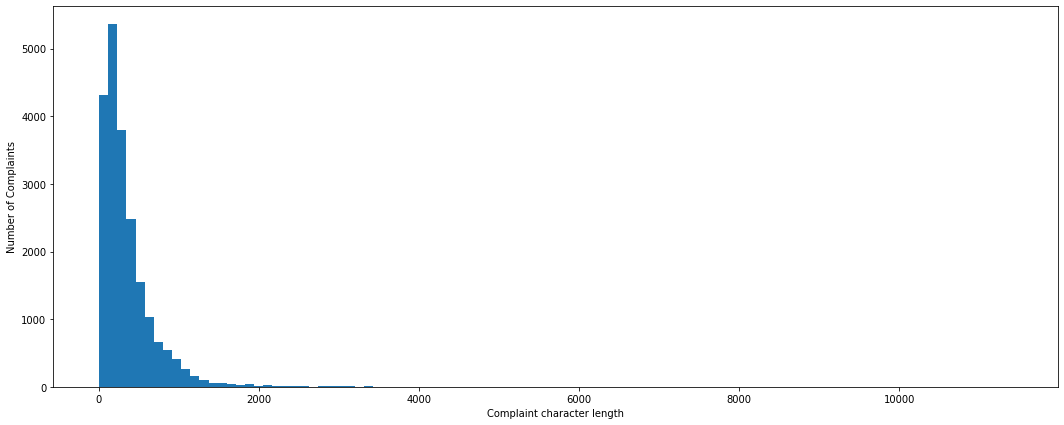

In [276]:
# Write your code here to visualise the data according to the 'Complaint' character length
plt.figure(figsize=(18,7))
length = [len(d) for d in df_clean.complaint_POS_removed]
plt.hist(length, bins = 100)
plt.ylabel('Number of Complaints')
plt.xlabel('Complaint character length')
sns.despine;

#### Find the top 40 words by frequency among all the articles after processing the text.

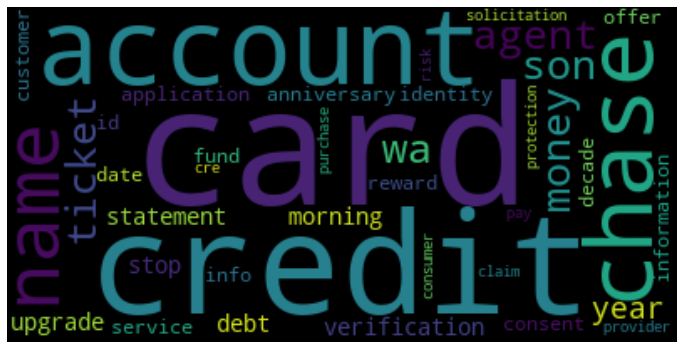

In [277]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud, STOPWORDS
stop=set(STOPWORDS)
wordcloud = WordCloud(max_words=40, random_state=1, stopwords=set(STOPWORDS))
wordcloud.generate(str(df_clean['complaint_POS_removed']))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [278]:
#Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')
df_clean

,complaint_what_happened,lemmatized,complaint_POS_removed,Complaint_clean
1,good morning my name is and i appreciate it if...,good morning my name is and i appreciate it if...,morning name stop debt verification statement ...,morning name stop debt verification statement ...
2,i upgraded my card in and was told by the agen...,i upgraded my card in and wa told by the agent...,card agent upgrade anniversary date agent info...,card agent upgrade anniversary date agent info...
10,chase card was reported on however fraudulent ...,chase card wa reported on however fraudulent a...,application identity consent service credit id...,application identity consent service credit id...
11,on while trying to book a ticket i came across...,on while trying to book a ticket i came across...,ticket offer ticket reward card information of...,ticket offer ticket reward card information of...
14,my grand son give me check for i deposit it in...,my grand son give me check for i deposit it in...,son chase account fund account money son money...,son chase account fund account money son money...
...,...,...,...,...
78303,after being a chase card customer for well ove...,after being a chase card customer for well ove...,chase card customer decade wa solicitation cre...,chase card customer decade wa solicitation cre...
78309,on wednesday i called chas my visa credit card...,on wednesday i called chas my visa credit card...,credit card provider claim purchase protection...,credit card provider claim purchase protection...
78310,i am not familiar with pay and did not underst...,i am not familiar with pay and did not underst...,pay risk consumer wa chase year banking mercha...,pay risk consumer wa chase year banking mercha...
78311,i have had flawless credit for yrs i ve had ch...,i have had flawless credit for yr i ve had cha...,credit credit card freedom problem balance tra...,credit credit card freedom problem balance tra...


#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [279]:
#Write  code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 
def uni_grams(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [280]:
#Print the top 30 words in the unigram frequency
common_words = uni_grams(df_clean['complaint_POS_removed'].values.astype('U'), 30)
df = pd.DataFrame(common_words, columns = ['unigram' , 'count'])
df

,unigram,count
0,account,47040
1,credit,32276
2,card,29810
3,chase,28646
4,payment,21327
5,wa,18468
6,time,16287
7,bank,15587
8,day,13214
9,charge,12200


In [281]:
#Print the top 10 words in the unigram frequency
common_words = uni_grams(df_clean['complaint_POS_removed'].values.astype('U'), 10)
df = pd.DataFrame(common_words, columns = ['unigram' , 'count'])
df

,unigram,count
0,account,47040
1,credit,32276
2,card,29810
3,chase,28646
4,payment,21327
5,wa,18468
6,time,16287
7,bank,15587
8,day,13214
9,charge,12200


In [282]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 
def bi_grams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [283]:
#Print the top 30 words in the bigram frequency
common_words = bi_grams(df_clean['Complaint_clean'].values.astype('U'), 30)
df = pd.DataFrame(common_words, columns = ['bigram' , 'count'])
df

,bigram,count
0,credit card,12637
1,credit report,3810
2,checking account,3081
3,account account,3050
4,customer service,2865
5,chase credit,2132
6,chase account,2122
7,bank account,2115
8,debit card,1910
9,account chase,1805


In [284]:
#Print the top 10 words in the bigram frequency
common_words = bi_grams(df_clean['Complaint_clean'].values.astype('U'), 10)
df = pd.DataFrame(common_words, columns = ['bigram' , 'count'])
df

,bigram,count
0,credit card,12637
1,credit report,3810
2,checking account,3081
3,account account,3050
4,customer service,2865
5,chase credit,2132
6,chase account,2122
7,bank account,2115
8,debit card,1910
9,account chase,1805


In [285]:
# Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 
def tri_grams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [286]:
##Print the top 30 words in the trigram frequency
common_words = tri_grams(df_clean['Complaint_clean'].values.astype('U'), 30)
df = pd.DataFrame(common_words, columns = ['trigram' , 'count'])
df

,trigram,count
0,chase credit card,1537
1,credit card account,1001
2,credit card company,962
3,credit card credit,648
4,inquiry credit report,554
5,card credit card,551
6,account credit card,507
7,charge credit card,412
8,credit card chase,412
9,credit reporting agency,399


In [287]:
#Print the top 10 words in the trigram frequency
common_words = tri_grams(df_clean['Complaint_clean'].values.astype('U'), 10)
df = pd.DataFrame(common_words, columns = ['trigram' , 'count'])
df

,trigram,count
0,chase credit card,1537
1,credit card account,1001
2,credit card company,962
3,credit card credit,648
4,inquiry credit report,554
5,card credit card,551
6,account credit card,507
7,charge credit card,412
8,credit card chase,412
9,credit reporting agency,399


## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [288]:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

In [289]:
#All masked texts has been removed
df_clean

,complaint_what_happened,lemmatized,complaint_POS_removed,Complaint_clean
1,good morning my name is and i appreciate it if...,good morning my name is and i appreciate it if...,morning name stop debt verification statement ...,morning name stop debt verification statement ...
2,i upgraded my card in and was told by the agen...,i upgraded my card in and wa told by the agent...,card agent upgrade anniversary date agent info...,card agent upgrade anniversary date agent info...
10,chase card was reported on however fraudulent ...,chase card wa reported on however fraudulent a...,application identity consent service credit id...,application identity consent service credit id...
11,on while trying to book a ticket i came across...,on while trying to book a ticket i came across...,ticket offer ticket reward card information of...,ticket offer ticket reward card information of...
14,my grand son give me check for i deposit it in...,my grand son give me check for i deposit it in...,son chase account fund account money son money...,son chase account fund account money son money...
...,...,...,...,...
78303,after being a chase card customer for well ove...,after being a chase card customer for well ove...,chase card customer decade wa solicitation cre...,chase card customer decade wa solicitation cre...
78309,on wednesday i called chas my visa credit card...,on wednesday i called chas my visa credit card...,credit card provider claim purchase protection...,credit card provider claim purchase protection...
78310,i am not familiar with pay and did not underst...,i am not familiar with pay and did not underst...,pay risk consumer wa chase year banking mercha...,pay risk consumer wa chase year banking mercha...
78311,i have had flawless credit for yrs i ve had ch...,i have had flawless credit for yr i ve had cha...,credit credit card freedom problem balance tra...,credit credit card freedom problem balance tra...


# <font color='green'>Task5:Feature Extraction</font>

Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [290]:
#Write code here to initialise the TfidfVectorizer 
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words="english")

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [291]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
dtm = tfidf.fit_transform(df_clean.Complaint_clean)

# <font color='green'>Task6:Topic Modelling</font>

## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

* Find the best number of clusters 
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints 
* Correct the labels if needed 
* Map the clusters to topics/cluster names

## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [292]:
#Load your nmf_model with the n_components i.e 5
num_topics = 5 

#keep the random_state =40
nmf_model = NMF(n_components=num_topics, random_state=40) 

In [293]:
nmf_model.fit(dtm)
len(tfidf.get_feature_names())

5592

In [294]:
#Print the Top-15 words for each of the topics
for index,topic in enumerate(nmf_model.components_):
    print('*****Top 15 words for the topic {} are*****'.format(index + 1))
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

*****Top 15 words for the topic 1 are*****
['transaction', 'number', 'business', 'wa', 'fee', 'day', 'deposit', 'branch', 'chase', 'checking', 'fund', 'money', 'bank', 'check', 'account']


*****Top 15 words for the topic 2 are*****
['customer', 'time', 'offer', 'point', 'purchase', 'month', 'score', 'year', 'limit', 'fee', 'account', 'balance', 'chase', 'credit', 'card']


*****Top 15 words for the topic 3 are*****
['statement', 'fee', 'property', 'rate', 'balance', 'wa', 'chase', 'year', 'time', 'home', 'modification', 'month', 'mortgage', 'loan', 'payment']


*****Top 15 words for the topic 4 are*****
['file', 'application', 'theft', 'letter', 'account', 'identity', 'score', 'reporting', 'debt', 'company', 'information', 'bureau', 'credit', 'report', 'inquiry']


*****Top 15 words for the topic 5 are*****
['information', 'service', 'time', 'email', 'purchase', 'company', 'letter', 'wa', 'chase', 'fraud', 'merchant', 'claim', 'dispute', 'transaction', 'charge']




In [295]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4

topic_results = nmf_model.transform(dtm)
topic_results[0].round(2)
topic_results[0].argmax()
topic_results.argmax(axis=1)

array([0, 1, 3, ..., 3, 1, 2], dtype=int64)

In [296]:
#Assign the best topic to each of the cmplaints in Topic Column

df_clean['Topic'] = topic_results.argmax(axis = 1)

In [297]:
df_clean.head()

,complaint_what_happened,lemmatized,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is and i appreciate it if...,good morning my name is and i appreciate it if...,morning name stop debt verification statement ...,morning name stop debt verification statement ...,0
2,i upgraded my card in and was told by the agen...,i upgraded my card in and wa told by the agent...,card agent upgrade anniversary date agent info...,card agent upgrade anniversary date agent info...,1
10,chase card was reported on however fraudulent ...,chase card wa reported on however fraudulent a...,application identity consent service credit id...,application identity consent service credit id...,3
11,on while trying to book a ticket i came across...,on while trying to book a ticket i came across...,ticket offer ticket reward card information of...,ticket offer ticket reward card information of...,3
14,my grand son give me check for i deposit it in...,my grand son give me check for i deposit it in...,son chase account fund account money son money...,son chase account fund account money son money...,0


In [298]:
#Print the first 5 Complaint for each of the Topics
df_clean_top5=df_clean.groupby('Topic').head(5)
df_clean_top5.sort_values('Topic')

,complaint_what_happened,lemmatized,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is and i appreciate it if...,good morning my name is and i appreciate it if...,morning name stop debt verification statement ...,morning name stop debt verification statement ...,0
24,mishandling of this account by chase auto and,mishandling of this account by chase auto and,account,account,0
17,with out notice j p morgan chase restricted my...,with out notice j p morgan chase restricted my...,p account debit card branch customer service r...,p account debit card branch customer service r...,0
14,my grand son give me check for i deposit it in...,my grand son give me check for i deposit it in...,son chase account fund account money son money...,son chase account fund account money son money...,0
27,i opened an account with chase bank on and use...,i opened an account with chase bank on and use...,account code bonus term everything account dep...,account code bonus term everything account dep...,0
32,my chase amazon card was declined for a cateri...,my chase amazon card wa declined for a caterin...,catering order brother funeral amount chase no...,catering order brother funeral amount chase no...,1
52,my roommate was stealing my chase debit card a...,my roommate wa stealing my chase debit card an...,roommate debit card driver license money accou...,roommate debit card driver license money accou...,1
2,i upgraded my card in and was told by the agen...,i upgraded my card in and wa told by the agent...,card agent upgrade anniversary date agent info...,card agent upgrade anniversary date agent info...,1
50,i am a senior citizen that has been scammed by...,i am a senior citizen that ha been scammed by ...,citizen ha company time share company nothing ...,citizen ha company time share company nothing ...,1
40,a sofa love seat table and chairs and was nev...,a sofa love seat table and chair and wa never ...,love seat table chair debit card furniture money,love seat table chair debit card furniture money,1


#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [299]:
#Create the dictionary of Topic names and Topics

Topic_names = {0:"Bank Account services",
               1:"Credit card or prepaid card", 
               2:"Others",
               3:"Theft/Dispute Reporting",
               4:"Mortgage/Loan"
              }
#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [300]:
df_clean

,complaint_what_happened,lemmatized,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is and i appreciate it if...,good morning my name is and i appreciate it if...,morning name stop debt verification statement ...,morning name stop debt verification statement ...,Bank Account services
2,i upgraded my card in and was told by the agen...,i upgraded my card in and wa told by the agent...,card agent upgrade anniversary date agent info...,card agent upgrade anniversary date agent info...,Credit card or prepaid card
10,chase card was reported on however fraudulent ...,chase card wa reported on however fraudulent a...,application identity consent service credit id...,application identity consent service credit id...,Theft/Dispute Reporting
11,on while trying to book a ticket i came across...,on while trying to book a ticket i came across...,ticket offer ticket reward card information of...,ticket offer ticket reward card information of...,Theft/Dispute Reporting
14,my grand son give me check for i deposit it in...,my grand son give me check for i deposit it in...,son chase account fund account money son money...,son chase account fund account money son money...,Bank Account services
...,...,...,...,...,...
78303,after being a chase card customer for well ove...,after being a chase card customer for well ove...,chase card customer decade wa solicitation cre...,chase card customer decade wa solicitation cre...,Credit card or prepaid card
78309,on wednesday i called chas my visa credit card...,on wednesday i called chas my visa credit card...,credit card provider claim purchase protection...,credit card provider claim purchase protection...,Mortgage/Loan
78310,i am not familiar with pay and did not underst...,i am not familiar with pay and did not underst...,pay risk consumer wa chase year banking mercha...,pay risk consumer wa chase year banking mercha...,Theft/Dispute Reporting
78311,i have had flawless credit for yrs i ve had ch...,i have had flawless credit for yr i ve had cha...,credit credit card freedom problem balance tra...,credit credit card freedom problem balance tra...,Credit card or prepaid card


# <font color='green'>Task7:Model Building</font>

## Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [301]:
#Create the dictionary again of Topic names and Topics

Topic_names = {"Bank Account services":0,
               "Credit card or prepaid card":1,
               "Others":2,
               "Theft/Dispute Reporting":3,
               "Mortgage/Loan":4}

# Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [302]:
df_clean

,complaint_what_happened,lemmatized,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is and i appreciate it if...,good morning my name is and i appreciate it if...,morning name stop debt verification statement ...,morning name stop debt verification statement ...,0
2,i upgraded my card in and was told by the agen...,i upgraded my card in and wa told by the agent...,card agent upgrade anniversary date agent info...,card agent upgrade anniversary date agent info...,1
10,chase card was reported on however fraudulent ...,chase card wa reported on however fraudulent a...,application identity consent service credit id...,application identity consent service credit id...,3
11,on while trying to book a ticket i came across...,on while trying to book a ticket i came across...,ticket offer ticket reward card information of...,ticket offer ticket reward card information of...,3
14,my grand son give me check for i deposit it in...,my grand son give me check for i deposit it in...,son chase account fund account money son money...,son chase account fund account money son money...,0
...,...,...,...,...,...
78303,after being a chase card customer for well ove...,after being a chase card customer for well ove...,chase card customer decade wa solicitation cre...,chase card customer decade wa solicitation cre...,1
78309,on wednesday i called chas my visa credit card...,on wednesday i called chas my visa credit card...,credit card provider claim purchase protection...,credit card provider claim purchase protection...,4
78310,i am not familiar with pay and did not underst...,i am not familiar with pay and did not underst...,pay risk consumer wa chase year banking mercha...,pay risk consumer wa chase year banking mercha...,3
78311,i have had flawless credit for yrs i ve had ch...,i have had flawless credit for yr i ve had cha...,credit credit card freedom problem balance tra...,credit credit card freedom problem balance tra...,1


In [303]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data = df_clean[["complaint_what_happened","Topic"]]

In [304]:
training_data

,complaint_what_happened,Topic
1,good morning my name is and i appreciate it if...,0
2,i upgraded my card in and was told by the agen...,1
10,chase card was reported on however fraudulent ...,3
11,on while trying to book a ticket i came across...,3
14,my grand son give me check for i deposit it in...,0
...,...,...
78303,after being a chase card customer for well ove...,1
78309,on wednesday i called chas my visa credit card...,4
78310,i am not familiar with pay and did not underst...,3
78311,i have had flawless credit for yrs i ve had ch...,1


####Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [305]:
#Write code to get the Vector count
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(training_data.complaint_what_happened)

#Write your code here to transform the word vector to tf-idf
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [306]:
from sklearn.model_selection import train_test_split

# Performing Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.Topic, test_size=0.25, random_state=42)

print('Shape of X_train {}:'.format(X_train.shape))
print('Shape of y_train {}:'.format(y_train.shape))
print('Shape of X_test {}:'.format(X_test.shape))
print('Shape of y_test {}:'.format(y_test.shape))

Shape of X_train (15804, 27795):
Shape of y_train (15804,):
Shape of X_test (5268, 27795):
Shape of y_test (5268,):


You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [307]:
# Create a function to evaluate models
from sklearn.metrics import f1_score, classification_report, confusion_matrix
def model_evaluation(y_test, y_pred, model_name):
    # print classification report of classifier
    print('*****Classification Report for {}*****\n'.format(model_name))
    print(classification_report(y_test, y_pred, target_names=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting","Mortgage/Loan"]))
    
    # Plot the Confusion Matrix
    plt.figure(figsize=(10,6))
    plt.title('**Confusion Matrix for {}**\n'.format(model_name))
    matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(matrix, annot=True, cbar=None, cmap="BuPu", fmt='d', xticklabels=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting","Mortgage/Loan"], yticklabels=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting","Mortgage/Loan"])
    plt.show()
    
    return

# <font color='orange'>Model1:Logistic Regression</font>

In [308]:
#Model for Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)
predicted_lr = lr.predict(X_test)

*****Classification Report for Logistic Regression*****

                             precision    recall  f1-score   support

      Bank Account services       0.91      0.94      0.92      1329
Credit card or prepaid card       0.91      0.89      0.90      1030
                     Others       0.93      0.95      0.94      1300
    Theft/Dispute Reporting       0.94      0.83      0.88       563
              Mortgage/Loan       0.88      0.88      0.88      1046

                   accuracy                           0.91      5268
                  macro avg       0.91      0.90      0.90      5268
               weighted avg       0.91      0.91      0.91      5268



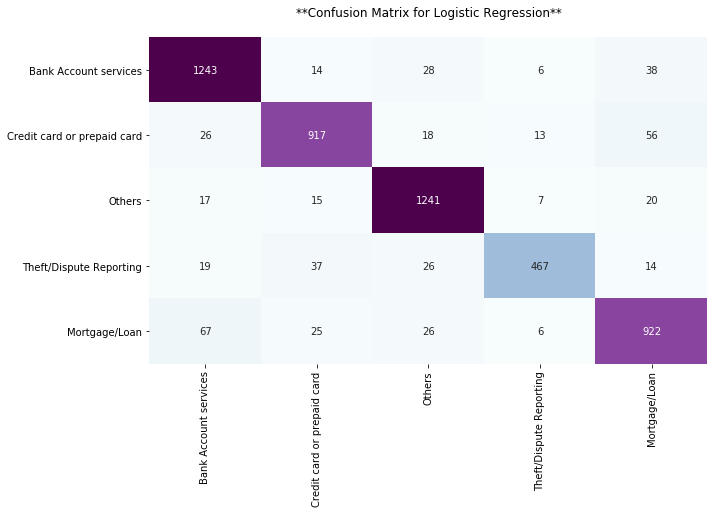

In [309]:
#Evaluate the Logistic Regression model
model_evaluation(y_test, predicted_lr, 'Logistic Regression')

# <font color='orange'>Model2:Decision Trees</font>

In [310]:
#Model for Decision Trees
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(X_train, y_train)
predicted_dt = dt.predict(X_test)

*****Classification Report for Decision Tree*****

                             precision    recall  f1-score   support

      Bank Account services       0.80      0.80      0.80      1329
Credit card or prepaid card       0.75      0.79      0.77      1030
                     Others       0.82      0.83      0.83      1300
    Theft/Dispute Reporting       0.74      0.73      0.74       563
              Mortgage/Loan       0.70      0.67      0.68      1046

                   accuracy                           0.77      5268
                  macro avg       0.76      0.76      0.76      5268
               weighted avg       0.77      0.77      0.77      5268



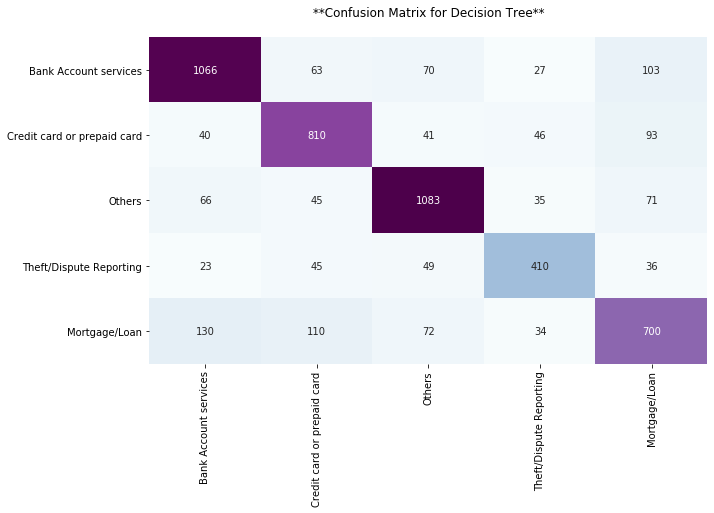

In [311]:
#Evaluate the Decision Tree classifier model
model_evaluation(y_test, predicted_dt, 'Decision Tree')

# <font color='orange'>Model3:Random Forest</font>

In [312]:
#Model for Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train, y_train)
predicted_rf = rf.predict(X_test)

*****Classification Report for Random Forest*****

                             precision    recall  f1-score   support

      Bank Account services       0.80      0.80      0.80      1329
Credit card or prepaid card       0.75      0.79      0.77      1030
                     Others       0.82      0.83      0.83      1300
    Theft/Dispute Reporting       0.74      0.73      0.74       563
              Mortgage/Loan       0.70      0.67      0.68      1046

                   accuracy                           0.77      5268
                  macro avg       0.76      0.76      0.76      5268
               weighted avg       0.77      0.77      0.77      5268



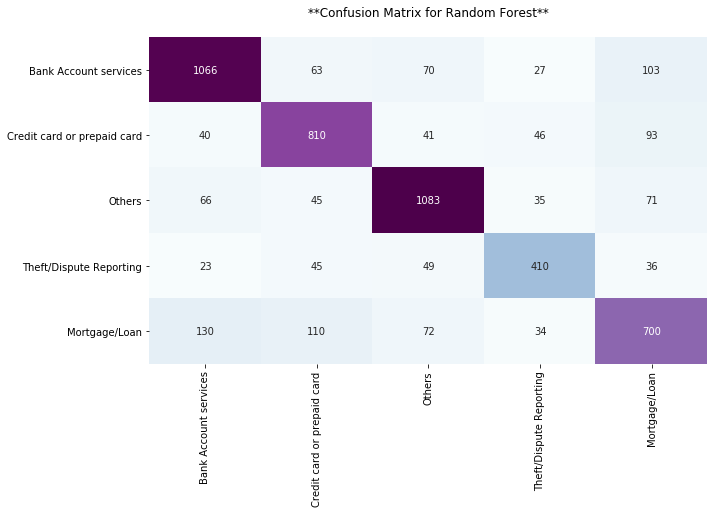

In [313]:
#Evaluate the Random Forest classifier model
model_evaluation(y_test, predicted_dt, 'Random Forest')

# <font color='blue'>Best Model selection</font>

In [314]:
#Get the F1 Score of each model in a table for comparison
f1_lr = f1_score(y_test, predicted_lr, average="weighted")
f1_dt = f1_score(y_test, predicted_dt, average="weighted")
f1_rf = f1_score(y_test, predicted_rf, average="weighted")
data=[['Logistic Regression',f1_lr], ['Decision Trees',f1_dt] , ['Random Forest',f1_rf]]
f1_df= pd.DataFrame(data, columns=['Model', 'F1_Score'])
print(f1_df)

                 Model  F1_Score
0  Logistic Regression  0.908913
1       Decision Trees  0.771938
2        Random Forest  0.812788


###  <font color='red'>We infer that Logistic Regression is the best performing model here.</font>

# <font color='green'>Task8:Model inference</font>

In [315]:
# Function to predict a topic for given text using our best performing model
def predict_topic(text):
    
    target_names = ["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting", "Mortgage/Loan"]
    X_counts = count_vect.transform(text)
    X_tfidf = tfidf_transformer.transform(X_counts)
    predicted = lr.predict(X_tfidf)

    return target_names[predicted[0]]

In [316]:
# Dataframe of sample customer complaints
df_sample = pd.DataFrame({'complaints': ["I can not get from chase who services my mortgage, who owns it and who has original loan docs", 
                                  "The bill amount of my credit card was debited twice. Please look into the matter and resolve at the earliest.",
                                  "I want to open a salary account at your downtown branch. Please provide me the procedure.",
                                  "Yesterday, I received a fraudulent email regarding renewal of my services.",
                                  "What is the procedure to know my CIBIL score?",
                                  "I need to know the number of bank branches and their locations in the city of Dubai"]})

In [317]:
# Create a new column of predicted topics of each complaint, predicted using the Logistic Regression model
df_sample['predicted topic'] = df_sample['complaints'].apply(lambda x: predict_topic([x]))
df_sample

,complaints,predicted topic
0,I can not get from chase who services my mortg...,Others
1,The bill amount of my credit card was debited ...,Credit card or prepaid card
2,I want to open a salary account at your downto...,Bank Account services
3,"Yesterday, I received a fraudulent email regar...",Mortgage/Loan
4,What is the procedure to know my CIBIL score?,Bank Account services
5,I need to know the number of bank branches and...,Bank Account services


###  <font color='red'>The predictions for the custom text looks good and hence our model is performing well</font>